<a href="https://colab.research.google.com/github/M-H-Amini/DeepLearningCourse/blob/master/SingleLayerPerceptron(FromScratch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In The Name Of ALLAH
# Single-Layer Perceptrons (From Scratch)
**Written By: Mohammad Hossein Amini (mhamini@aut.ac.ir)**

I'm gonna code a single-layer perceptron from scratch just using **numpy**.
First, let's do the import stuff...



In [0]:
import numpy as np
import matplotlib.pyplot as plt

I'm gonna make a class named **SLP** 

In [0]:
class SLP:
  def __init__(self, X, y, learning_rate = 1):
    self.X = X  #  Each column is a sample
    self.y = y  #  y should have 2 dimensions
    self.W = np.random.rand(self.y.shape[0], self.X.shape[0])
    self.b = np.random.rand(self.y.shape[0], 1)
    self.lr = learning_rate
    
  def hardlim(self, z):
    return np.floor((1 + np.sign(z))/2)
  
  def train(self, iterations = 100, print_details = True):
    counter = 0
    for i in range(iterations):
      if not self.check():
        index = np.random.randint(0, self.X.shape[1])
        prediction = self.predict(self.X[:, index : index + 1])
        actual = self.y[:,index:index + 1]
        error = actual - prediction
        self.W = self.W + self.lr * error * np.transpose(self.X[:, index:index + 1])
        self.b = self.b + self.lr * error
        counter += 1
      else:
        print('Trained in {} steps!'.format(counter))
        break
      
  def predict(self, x):
    return self.hardlim(np.dot(self.W, x) + self.b)
      
  def check(self):
    for i in range(self.X.shape[1]):
      if not np.array_equal(self.predict(self.X[:, i : i+1]), self.y[:, i : i + 1]):
        return False
    return True

Now, I'm gonna test my class as an "AND" and "OR" gate! Let's see...

In [81]:
X = np.transpose(np.array([[1, 1],
                           [1, 0],
                           [0, 1],
                           [0, 0]]))
y = np.array([[1, 0, 0, 0],
              [1, 1, 1, 0]])

nn = SLP(X, y)
nn.train()
for i in range(4):
  test_index = i
  print('Test no: {}'.format(i + 1))
  print('Input: ')
  print(X[:, test_index : test_index + 1])
  print('Actual output:')
  print(y[:, test_index : test_index + 1])
  print('Predicted output:')
  print(nn.predict(X[:, test_index : test_index + 1]))
  print('--------------------')

Trained in 18 steps!
Test no: 1
Input: 
[[1]
 [1]]
Actual output:
[[1]
 [1]]
Predicted output:
[[1.]
 [1.]]
--------------------
Test no: 2
Input: 
[[1]
 [0]]
Actual output:
[[0]
 [1]]
Predicted output:
[[0.]
 [1.]]
--------------------
Test no: 3
Input: 
[[0]
 [1]]
Actual output:
[[0]
 [1]]
Predicted output:
[[0.]
 [1.]]
--------------------
Test no: 4
Input: 
[[0]
 [0]]
Actual output:
[[0]
 [0]]
Predicted output:
[[0.]
 [0.]]
--------------------


It's a good idea to see the decision boundary for the 'AND' output now.

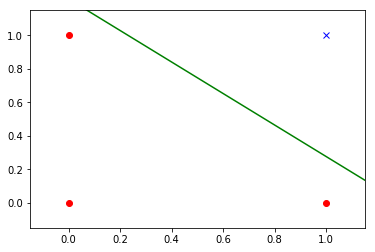

In [82]:
plt.figure()
plt.plot(X[0, 1:], X[1, 1 :], 'ro')
plt.plot(X[0, 0:1], X[1, 0 : 1], 'bx')
decision_x = np.linspace(0, 1.15, 10)
decision_y = -nn.b[0, 0]/nn.W[0, 1] - np.dot(decision_x, nn.W[0, 0]/nn.W[0, 1])
plt.plot(decision_x, decision_y, 'g')
plt.xlim([-0.15, 1.15])
plt.ylim([-0.15, 1.15])
plt.show()